In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
from nltk.corpus import stopwords

warnings.filterwarnings('ignore')

plt.style.use('ggplot')

In [2]:
data_path = '../data/twitter_data'
data = pd.read_csv(data_path + '/tweet_train.csv', sep=',')
data.head()

,Tweet,label
0,What do you think?\nhttps://t.co/x6dE3HYtyv\nT...,0
1,Omggg Laurel is such a cunt 🤭😧 #HowToGetAwayWi...,0
2,A nigga with a gun would pop they ass https://...,1
3,Cunt fae Airdrie in love island haha class,1
4,"RT @h7ney: You 🛐 sucked my cock🍆, you both fuc...",0


In [22]:
# data cleaning
stop_words = stopwords.words('english')
stop_words.remove('not')
stop_words.remove('no')
data['Tweet'] = data['Tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))  # removing stopwords
data["Tweet"] = data['Tweet'].str.replace(r'[^\w\s]+', '') # remove punctuation
data["Tweet"] = data['Tweet'].str.replace(r'\d+', '') # Remove numbers

In [25]:
# remove tweets containing "account temporarily suspended" tweets and "account temporarily unavailable" 
data = data[~data['Tweet'].str.contains("account temporarily suspended")]
data = data[~data['Tweet'].str.contains("account temporarily unavailable")]

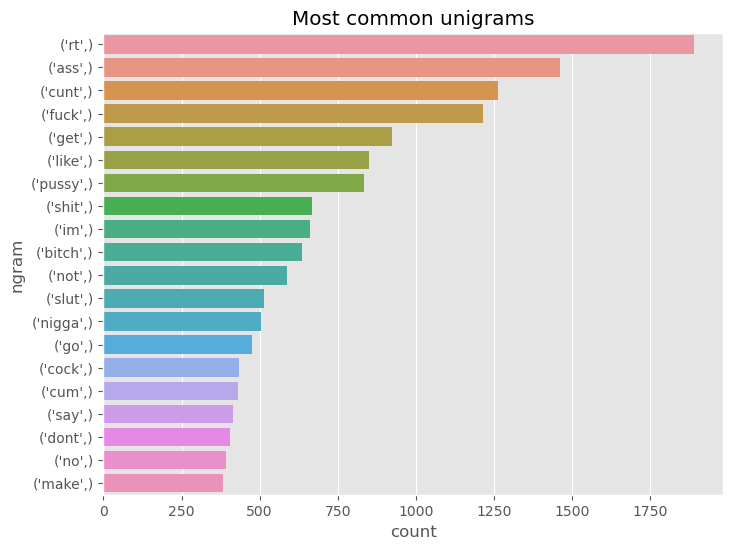

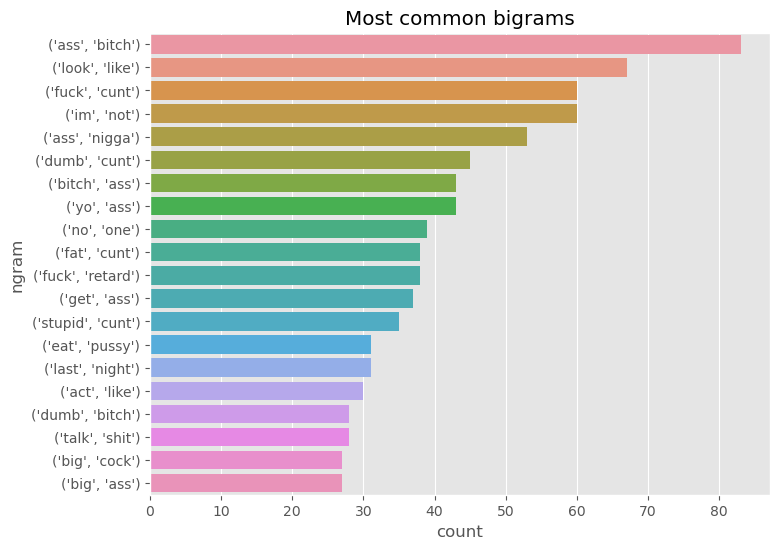

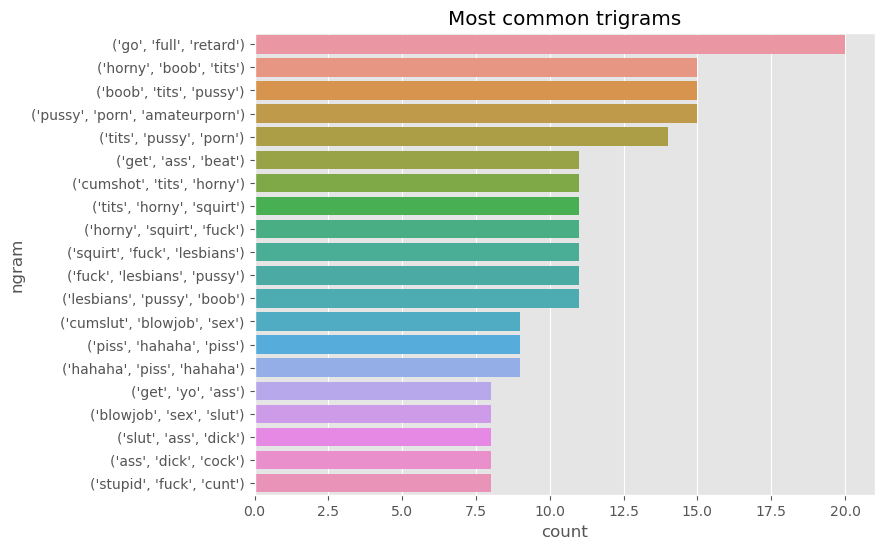

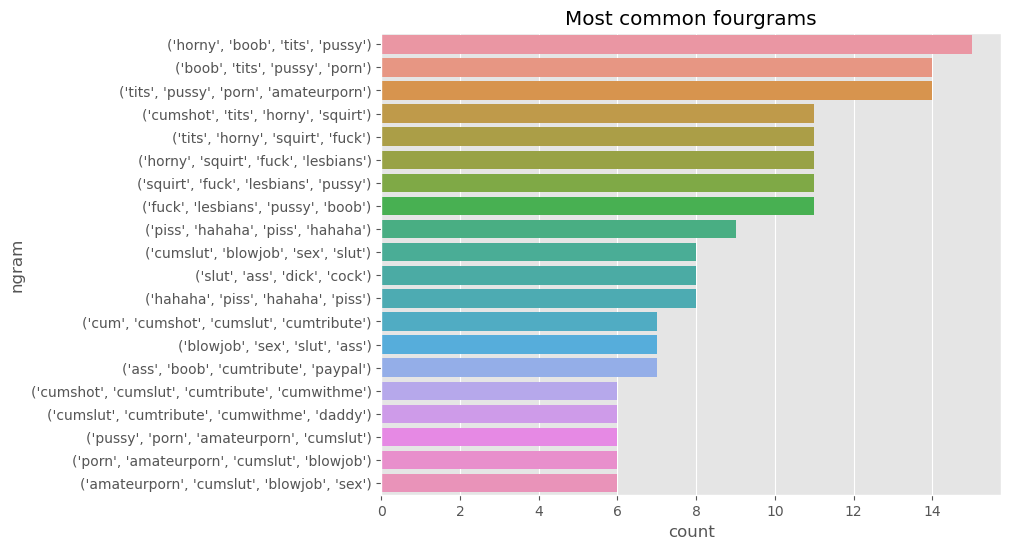

In [26]:
from nltk.util import ngrams
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

def preprocess_text(text):
    """Preprocess text into normalised tokens."""
    # Tokenise words into alphabetic tokens
    tokeniser = RegexpTokenizer(r'[A-Za-z]{2,}')
    tokens = tokeniser.tokenize(text)
    
    # Lowercase and lemmatise 
    lemmatiser = WordNetLemmatizer()
    lemmas = [lemmatiser.lemmatize(token.lower(), pos='v') for token in tokens]
    
    # Remove stopwords
    keywords= [lemma for lemma in lemmas if lemma not in stop_words]
    return keywords
def get_frequent_ngram(corpus, ngram, n=20):
    """Find most common n n-grams tokens."""
    # Preprocess each document
    documents = [preprocess_text(document) for document in corpus]
    
    # Find ngrams per document
    n_grams = [list(ngrams(document, ngram)) for document in documents]
    
    # Find frequency of ngrams
    n_grams_flattened = [item for sublist in n_grams for item in sublist]
    freq_dist = FreqDist(n_grams_flattened)
    top_freq = freq_dist.most_common(n)
    return pd.DataFrame(top_freq, columns=["ngram", "count"])
# Get frequent ngrams for all 4
for i in range(1,5):
    mapping = {1:"uni", 2:"bi", 3:"tri", 4:"four"}
    plt.figure(figsize=(8,6))
    sns.barplot(x="count", y="ngram", data=get_frequent_ngram(data['Tweet'], i))
    plt.title(f"Most common {mapping[i]}grams")
    plt.savefig("figures/common{}grams.png".format(i), bbox_inches='tight')